In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [18]:
import matplotlib.font_manager as font_manager
from os.path import expanduser
import matplotlib as mpl
fontpath = expanduser("/mnt/c/Windows/Fonts/LinLibertine_aS.ttf")
prop = font_manager.FontProperties(fname=fontpath)
# mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = 'r\usepackage{libertine}'
new_rc_params = {
    'text.usetex':True,
#     'figure.dpi':80,
#     'text.latex.preamble':r'\usepackage{libertine}',
    'font.size':15,
    'font.family':'Linux Libertine'
}
mpl.rcParams.update(new_rc_params)

In [16]:
def plot_bars_2(series1, series2, series3, x_v, series1_lbl, series2_lbl, series3_lbl, x_label):
    N = len(series1)
    ind = np.arange(N) 
    width = 0.15      
#     plt.line(ind-width, series1, width, label=series1_lbl, color="white", edgecolor="blue", hatch="///")
#     plt.bar(ind, series2, width,
#         label=series2_lbl, color="white", edgecolor="red", hatch="++")
#     plt.bar(ind + width, series3, width,
#         label=series3_lbl, color="white", edgecolor="black", hatch="xxx")
    plt.plot(series1, label=series1_lbl)
    plt.plot(series2, label=series2_lbl)
    plt.plot(series3, label=series3_lbl)
    plt.xticks(ind, x_v, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel("Speedup", fontsize=18)
    plt.legend()
#     plt.show()
#     plot_name = exp_type+"-"+series1_lbl+"-"+series2_lbl+"_"+l_percentage+".png"
    plt.savefig("/Users/aneeshr/Desktop/latest_mixed_aug20.pdf")
    plt.close()

In [21]:
def plot_lines(series1,x_s, x_v, series1_lbl, series2_lbl, plot_name, worst_factor=0.8):
    N = len(series1[0])
    ind = np.arange(N) 
    default = np.ones(N)
    width = 0.15     
    # plotting a line plot after changing it's width and height
    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(3.5)

    worst = np.ones(N)*(worst_factor)
#     fig, ax = plt.subplots()
#     print(series2[1], series1[2])
    plt.plot(x_s,series1[0], label="Fully sorted", marker="^", markersize=10, fillstyle="none")
    plt.plot(x_s,series1[1], label="Near-sorted" , marker="+",markersize=10, fillstyle="none")
    plt.plot(x_s,series1[2], label="Less sorted" , marker="x",markersize=10, fillstyle="none")
    plt.plot(x_s,worst, label="Scrambled", linestyle="--")
    
#     plt.plot(series2[0], label="K = 0\%; " + series1_lbl, marker="x")
#     plt.plot(series2[1], label="K = 5\%, L = 2\%; " + series1_lbl, marker="x")
#     plt.plot(series2[2], label="K = 50\%, L = 50\%; " + series1_lbl, marker="x")
# linestyle = "--"
    plt.plot(x_s,default, label="B$^+$-tree Cost", linestyle="solid", marker="o", markersize=10, fillstyle="none", color="k")
    
    plt.text(x_s[0]+2, series1[0][0]-0.1, "K=0\%")
    plt.text(x_s[0]+2, series1[1][0], "K=5\%, L=5\%")
    plt.text(x_s[0]+2, series1[2][0]+0.3, "K=50\%, L=50\%")
#     plt.xticks(ind, x_v)
    plt.xlabel("Read:Write Ratio", fontsize=16)
    plt.ylabel("Speedup", fontsize=16)
    plt.legend(bbox_to_anchor=(0.63, 1.02), loc='upper left', frameon=False)
    plt.tight_layout()
#     ax.set_xticks(x_s)
#     ax.set_xticklabels(x_v)
    plt.xticks(x_s, x_v)
    plt.ylim(0,10)
#     plot_name = exp_type+"-"+series1_lbl+"-"+series2_lbl+"_"+l_percentage+".png"
#     plt.savefig("./plots/"+plot_name)
    plt.savefig("./new_plots/"+plot_name+".pdf",transparent=True)
    plt.show()
    plt.close()

In [5]:
x = ["10:90","25:75","40:60","50:50","60:40","75:25","90:10"]

x2 = ["Completely Sorted", "Near-Sorted"]
x_s = [10,25,40,50,60,75,90]

In [6]:
bpy = [
    [8.765,6.161, 4.496, 3.741, 2.945, 2.091, 1.401],
    [5.04, 4.046, 3.286, 2.810, 2.416, 1.858, 1.280],
    [0.989, 0.984, 0.981, 0.978, 0.940, 0.925, 0.911]
]
# bpy = np.array(bpy)

# bpy2 = b.T

x_lbls_1 = [s + " 0.5\% OSMBuf" for s in x2]

In [20]:
bpy_1 = [
    [],
    []
]
# bpy_1 = np.array(bpy_1)

# bpy_1_2 = bpy_1.T

x_lbls_2 = [s + " 1\% OSMBuf" for s in x2]

In [21]:
bpy_1[1]

[]

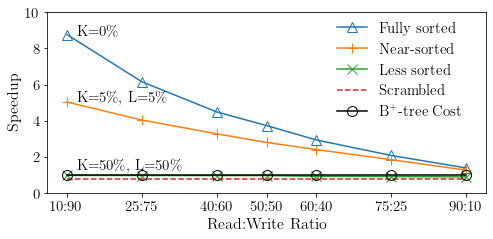

In [22]:
plot_lines(bpy,x_s, x, "1\% OSMBufSize", "", "mixed", 0.8)

In [23]:
bpdisk = [
    [8.07,4.93,3.40,3.20,2.74,2.41,2.34],
    [5.49,3.77,2.90,2.50,2.31,1.91,1.70],
    [1.35,1.33,1.30,1.30,1.27,1.26,1.25]
]

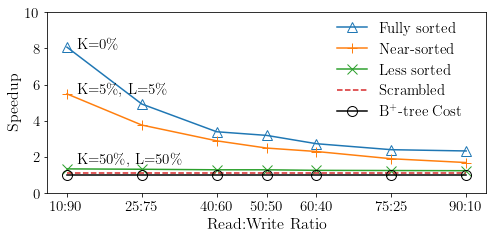

In [24]:
plot_lines(bpdisk,x_s, x, "1\% OSMBufSize", "", "mixed_disk", 1.13)